In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly
from scipy import stats

In [ ]:
# Parameters of interest
SIGMA = np.array([[5,-2],[-2,8]])
MIU = [50,3]
N = 10_000
A = 0.5
B = 3

In [ ]:
# The following function simulates a multivariate normal variance mixture distribution and returns a sample.
# It should the following function simulates a specific class of multivariate normal variance models that assumes:
#      X = miu + wAZ,  
# where:
# * miu is the mean vector
# * A is the cholesky decomposition of the scaling matrix sigma (covariance matrix of desired normal distribution)
# * Z is a random vector of a multivariate normal distribution with mean =(0,0,..,0)' and covariance = I
# * w is uniformly distributed random variable
# Normal variance mixture models use a component w that is distributed according to a desired distribution and thus
# not necessarily uniformly distributed as in function bellow 

In [21]:

def nomal_variance_mixture(miu, sigma, n, a,b):
    Z =  stats.multivariate_normal.rvs(cov = np.identity(len(sigma)), size = n)  #nx2 matrix
    W = np.sqrt(stats.uniform.rvs(loc=0.5,scale=3, size = n))
    
    for i in range(n):
        Z[i,:] = Z[i,:]*W[i]
        
    A = np.linalg.cholesky(SIGMA)    #Cholesky Decomposition of sigma Matrix
    X = np.array(miu) + np.matmul(A, Z.transpose()).transpose()   # X = miu + wAZ0 (normal variance mixture)
    return X 



array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

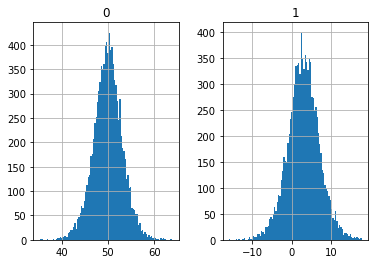

In [24]:
X = nomal_variance_mixture(miu= MIU, sigma= SIGMA, n= N, a= A,b= B)
pd.DataFrame(X).hist(bins = 100)


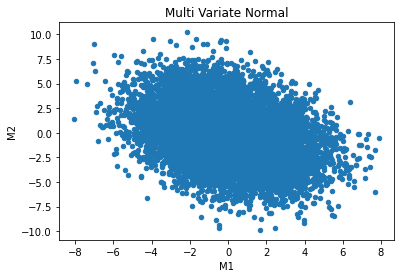

In [29]:
x1 = stats.multivariate_normal.rvs(cov = SIGMA, size = n)
X1 = pd.DataFrame(x1)
X1.plot.scatter([0,],[1,], title = 'Multi Variate Normal', xlabel = 'M1', ylabel = 'M2')
plt.show()

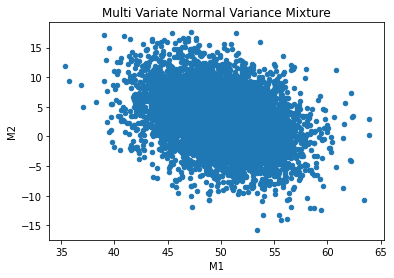

In [30]:
X = pd.DataFrame(X)
X.plot.scatter([0,], [1,], title = 'Multi Variate Normal Variance Mixture', xlabel = 'M1', ylabel = 'M2')
plt.show()

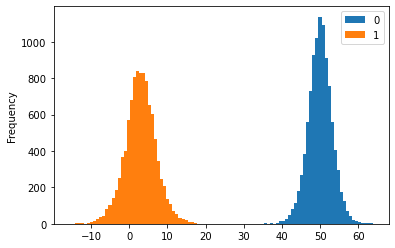

In [33]:
X.plot.hist(0, bins = 100 )
plt.show()

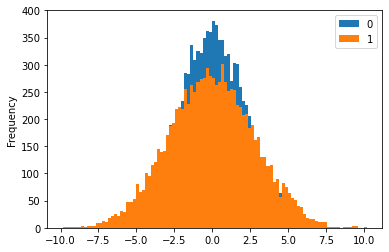

In [32]:
X1.plot.hist(0, bins = 100)
plt.show()

In [41]:
# Marginal Skew and Excess Kurtosis of multivariate normal sample
print('skew(X1) = ',stats.skew(X1))
print('excess kurtosis(X1) = ', stats.kurtosis(X1))

skew(X1) =  [0.03554716 0.01709717]
excess kurtosis(X1) =  [-0.00145684 -0.11056584]


In [36]:
# Marginal Skew and Excess Kurtosis of  normal variance mixture sample
print('skew(X) = ', stats.skew(X))
print('excess kurtosis(X) = ', stats.kurtosis(X))

skew(X) =  [-0.01220597 -0.02590897]
kurtosis(X) =  [0.65790189 0.57737211]


In [11]:
stats.mstats.describe(X)

DescribeResult(nobs=array([10000, 10000]), minmax=(masked_array(data=[ 34.67806063, -14.23955198],
             mask=False,
       fill_value=1e+20), masked_array(data=[62.63001394, 20.99899937],
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[49.98187338,  2.97707799],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[10.10358995, 16.1892731 ],
             mask=False,
       fill_value=1e+20), skewness=masked_array(data=[-0.04062786, -0.0157295 ],
             mask=False,
       fill_value=1e+20), kurtosis=masked_array(data=[0.43836141, 0.52071585],
             mask=False,
       fill_value=1e+20))

In [12]:
stats.mstats.describe(X1)

DescribeResult(nobs=array([10000, 10000]), minmax=(masked_array(data=[40.77101365, -7.33556248],
             mask=False,
       fill_value=1e+20), masked_array(data=[58.50494883, 14.9746176 ],
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[49.99215793,  2.98494106],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[5.09723293, 8.14251223],
             mask=False,
       fill_value=1e+20), skewness=masked_array(data=[-0.04456165, -0.015628  ],
             mask=False,
       fill_value=1e+20), kurtosis=masked_array(data=[-0.01528011, -0.00118467],
             mask=False,
       fill_value=1e+20))